Examples for the classical and quantum solution for system specifications verification. 

In [ ]:
# This cell is the command used to convert the quantum_check.ipynb file into a python script
!jupyter nbconvert --to script quantum_check.ipynb

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
import qiskit.quantum_info as qi
import numpy as np
from quantum_check import construct_circuit, check_consistency
from classical_check import check_specification_consistency

Classical algorithm tests.

Examples:

- Inconsistent
- Consistent
- Consistent with larger functions

In [6]:
terms = ["1x0", "00x"]
var = 3
print(f"Terms: {terms}")
print(f"{check_specification_consistency(var, terms)}\n")


terms = ["0x1", "00x"]
var = 3
print(f"Terms: {terms}")
print(f"{check_specification_consistency(var, terms)}\n")

terms = ["0x1x1", "x01x1", "00xxx","0x11x","xx1x1"]
var = 5
print(f"Terms: {terms}")
print(f"{check_specification_consistency(var, terms)}\n")

Terms: ['1x0', '00x']
False

Terms: ['0x1', '00x']
True

Terms: ['0x1x1', 'x01x1', '00xxx', '0x11x', 'xx1x1']
True



Simulation of quantum circuit using AerSimulator. This simualtion works on a classical machine, testing various parameters. 

Examples:

- Inconsistent
- Consistent
- Consistent with larger circuit

The system is inconsistent. C=0.0


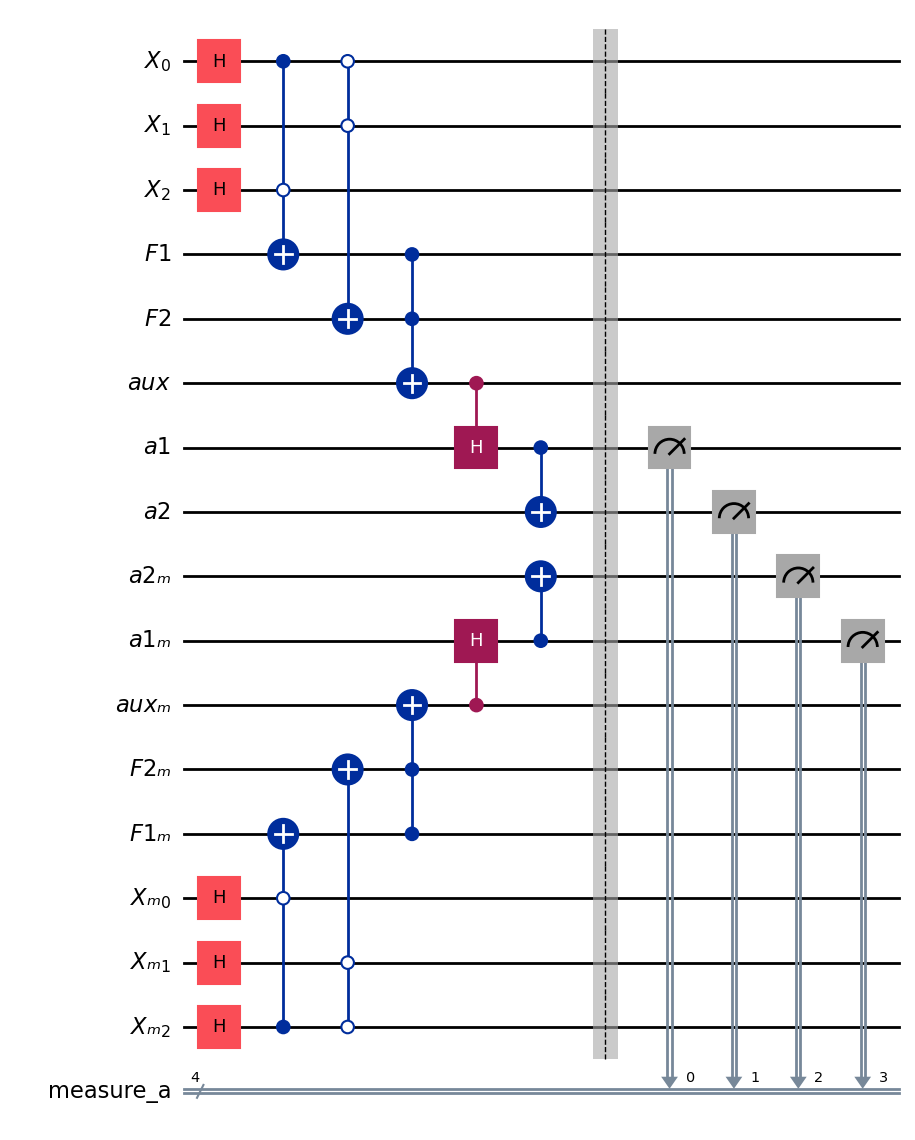

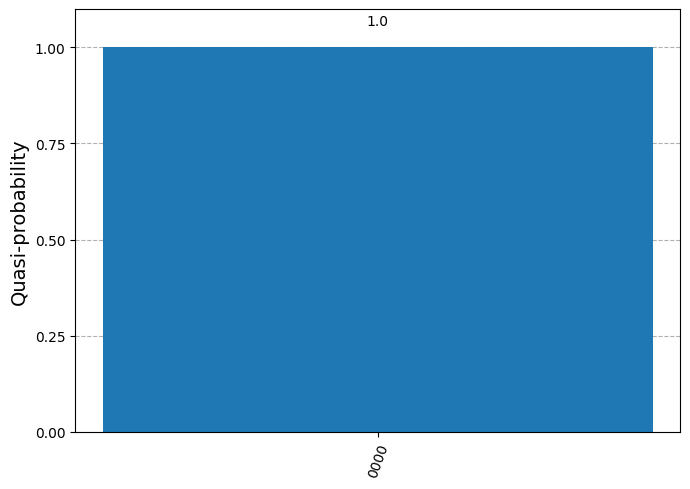

In [5]:
terms = ["1x0", "00x"]
var = 3
func = 2

circ = construct_circuit(terms, var, func)
circ.draw("mpl");

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
runs = 1000
probabilities = {k:v/runs for k,v in result.get_counts().items()}
plot_distribution(probabilities);

p0011=probabilities.get('0011',0)
p1100=probabilities.get('1100',0)

check_consistency([p0011,p1100]);


The system is consistent. C=0.5079370039680118


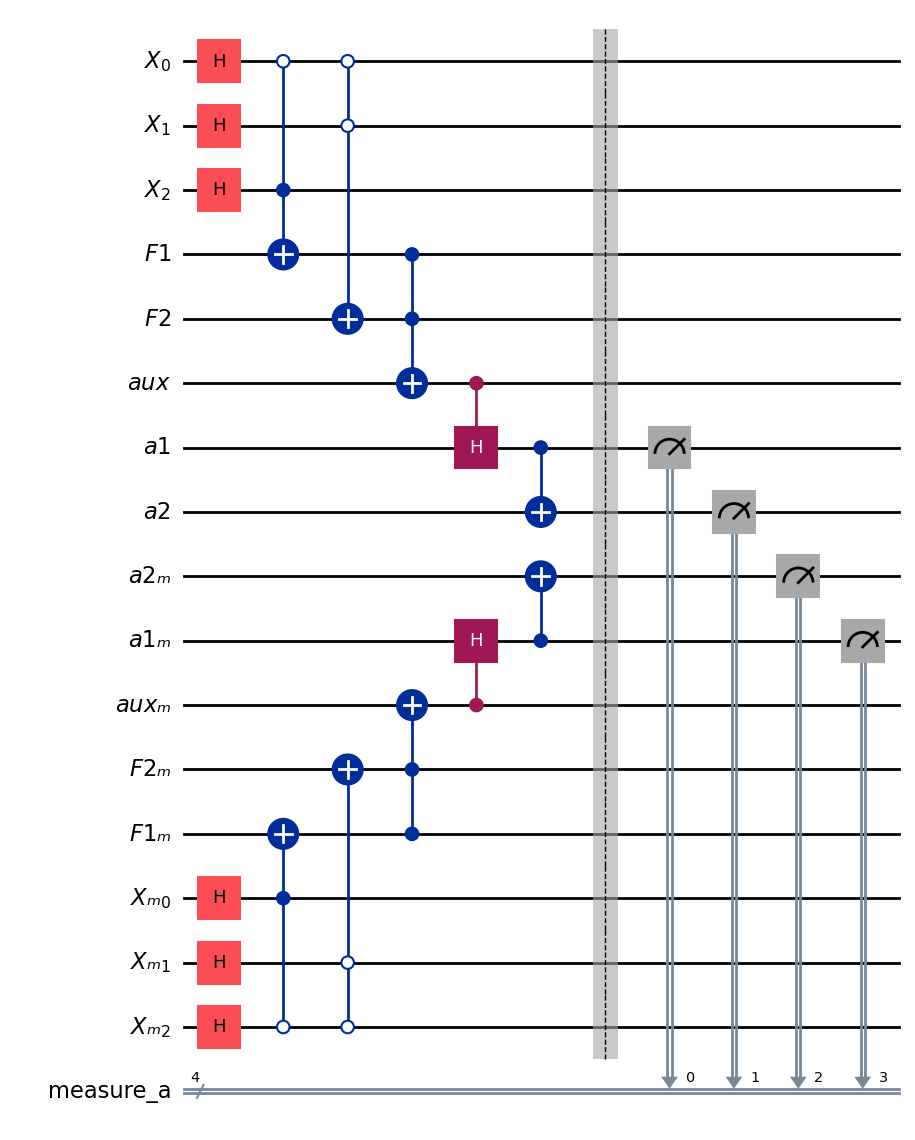

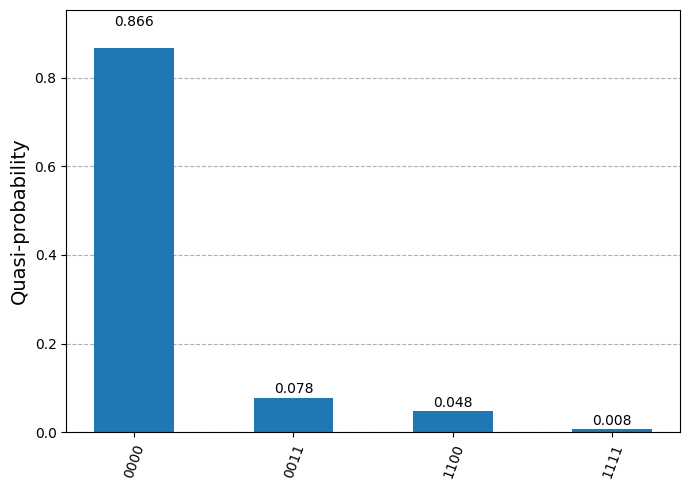

In [6]:
terms = ["0x1", "00x"]
var = 3
func = 2

circ = construct_circuit(terms, var, func)
circ.draw("mpl");

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
runs = 1000
probabilities = {k:v/runs for k,v in result.get_counts().items()}
plot_distribution(probabilities);

p0011=probabilities.get('0011',0)
p1100=probabilities.get('1100',0)

check_consistency([p0011,p1100]);

Consistent system simulation of a more complex system

The system is consistent. C=0.8366600265340756


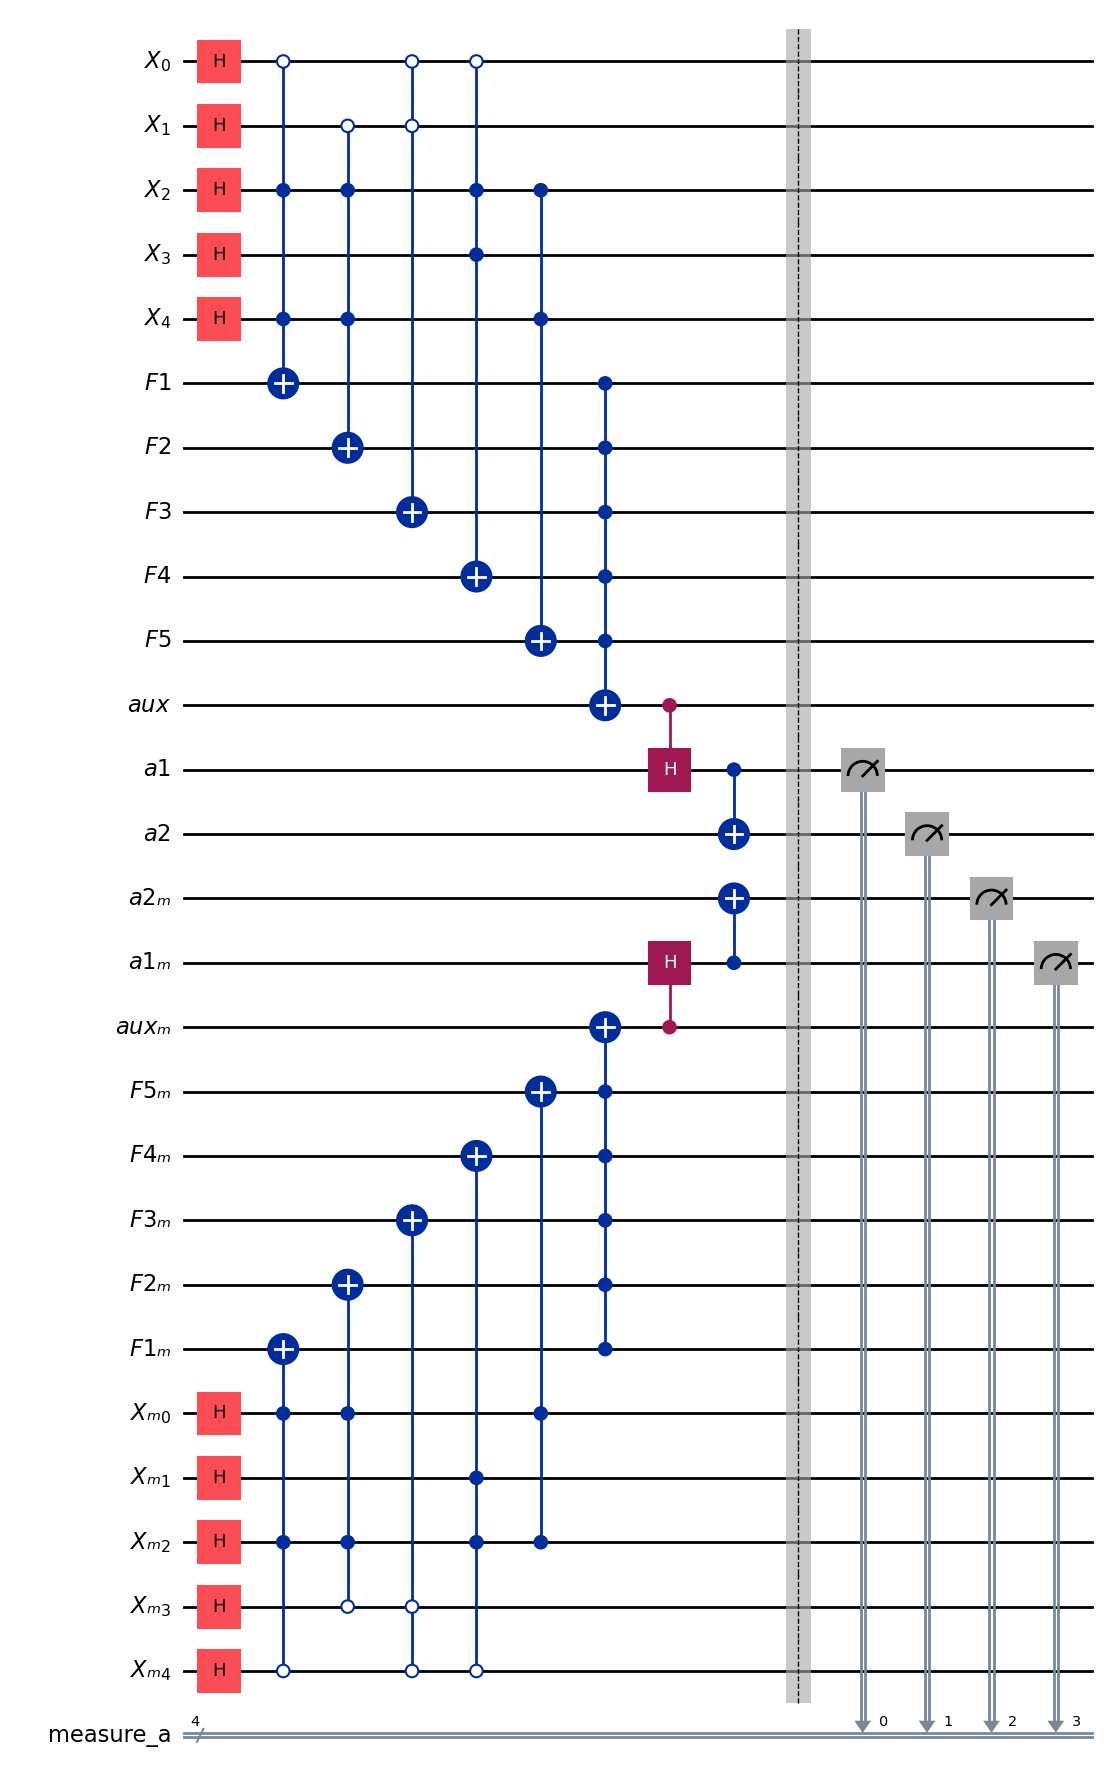

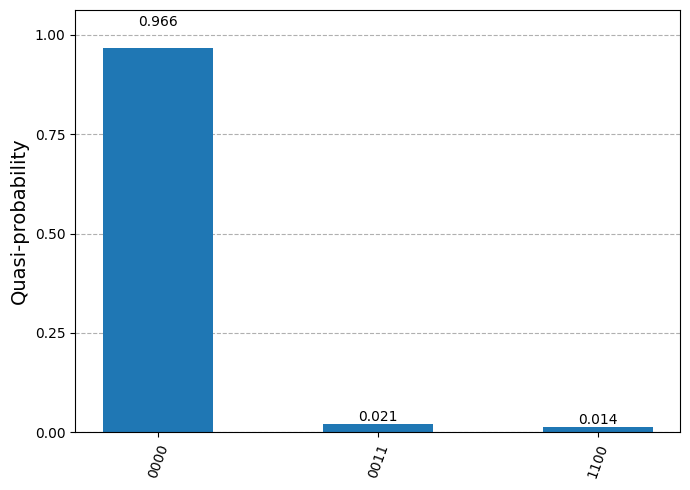

In [12]:
terms = ["0x1x1", "x01x1", "00xxx","0x11x","xx1x1"]
var = 5
func = 5

circ = construct_circuit(terms, var, func)
circ.draw("mpl");

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
shots = 100
probabilities = {k:v/shots for k,v in result.get_counts().items()}
plot_distribution(probabilities);

p0011=probabilities.get('0011',0)
p1100=probabilities.get('1100',0)

check_consistency([p0011,p1100]);